<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/da05_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 모듈 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box Plot

In [5]:
tips.total_bill.describe()

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


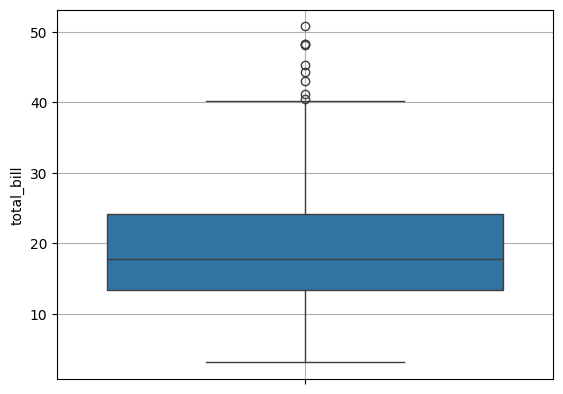

In [6]:
sns.boxplot(data=tips, y='total_bill')
plt.grid()
plt.show()

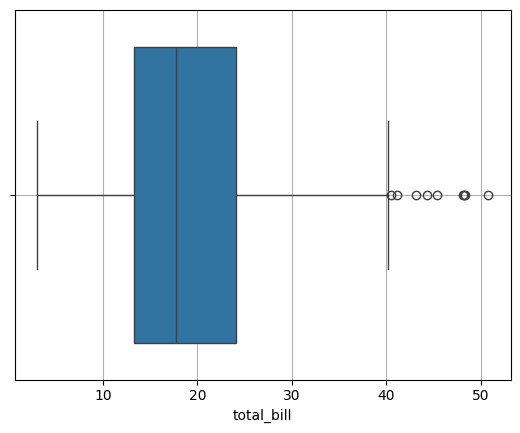

In [7]:
sns.boxplot(data=tips, x='total_bill')
plt.grid()
plt.show()

## 성별 팁의 box plot

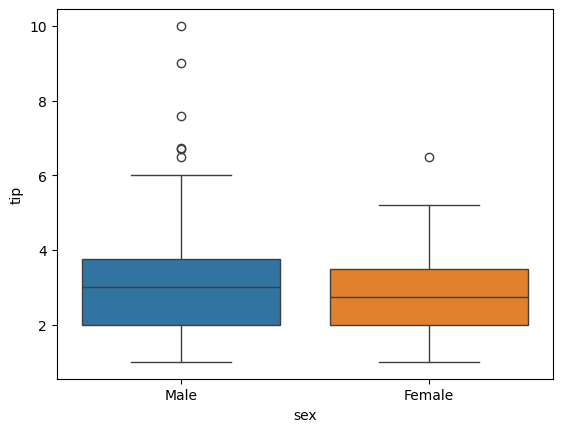

In [8]:
sns.boxplot(data=tips, x='sex', y='tip', hue='sex')
plt.show()

In [9]:
tips[tips.sex == 'Male'].tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [10]:
tips[tips.sex == 'Female'].tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


## 흡연 여부별 팁의 box plot

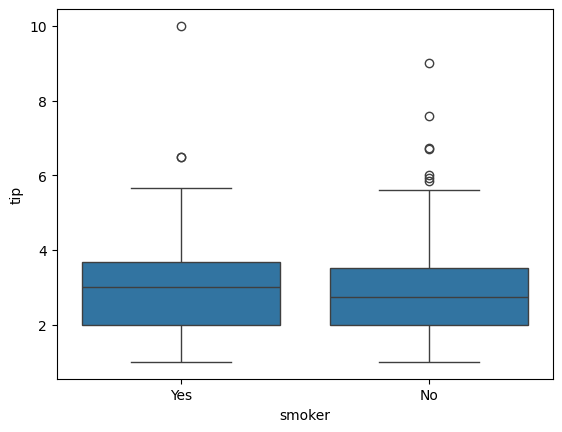

In [11]:
sns.boxplot(data=tips, x='smoker', y='tip')
plt.show()

## 요일별 팁의 box plot

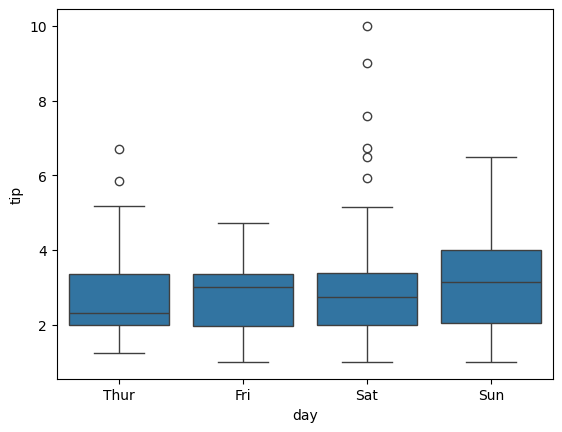

In [12]:
sns.boxplot(data=tips, x='day', y='tip')
plt.show()

## 시간별 팁의 box plot

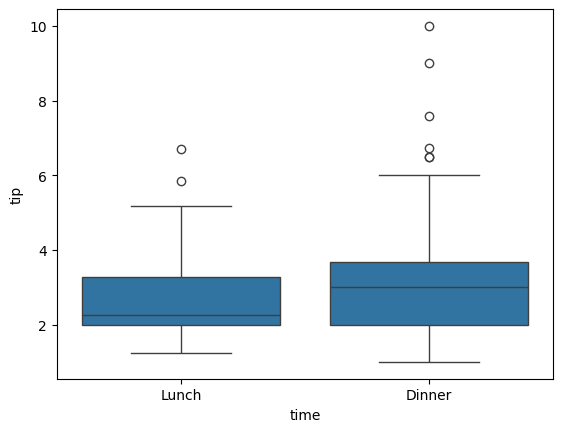

In [13]:
sns.boxplot(data=tips, x='time', y='tip')
plt.show()

## 요일별, 성별 팁의 box plot

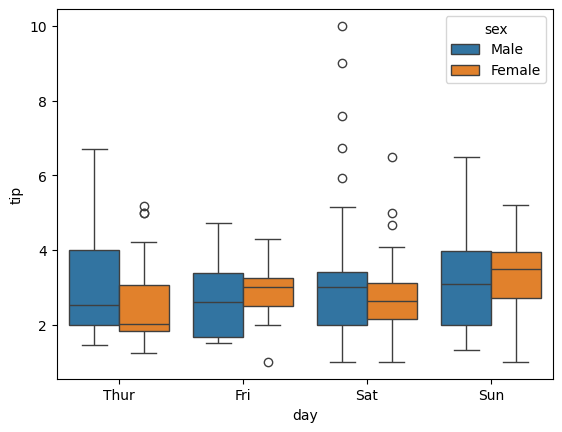

In [14]:
sns.boxplot(data=tips, x='day', y='tip', hue='sex')
plt.show()

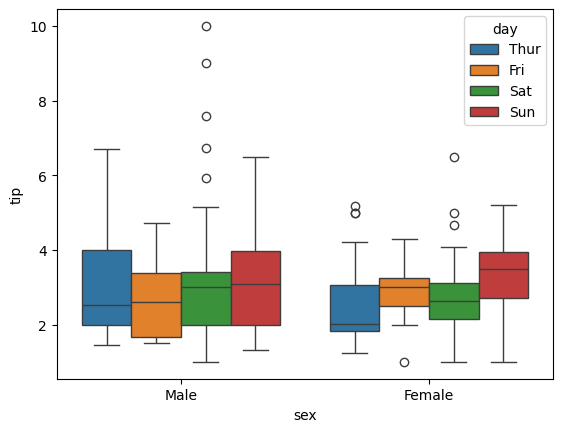

In [15]:
sns.boxplot(data=tips, x='sex', y='tip', hue='day')
plt.show()

## 2개 이상의 Axes 사용하기

Figure에 Axes(nrows=1, ncol=2) 2개를 생성하고, 성별 tip의 box plot과 시간별 tip의 box plot을 그리세요.

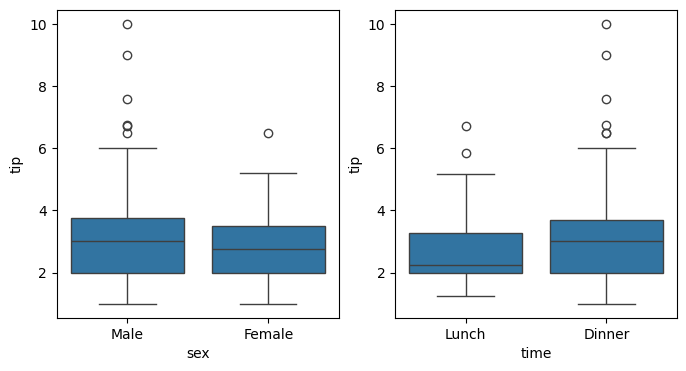

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

sns.boxplot(data=tips, x='sex', y='tip', ax=axes[0])
sns.boxplot(data=tips, x='time', y='tip', ax=axes[1])

plt.show()

# Histogram(히스토그램)

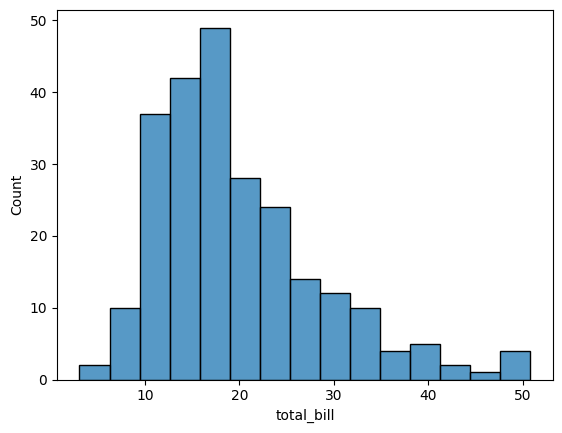

In [17]:
sns.histplot(data=tips, x='total_bill', bins=15)
plt.show()

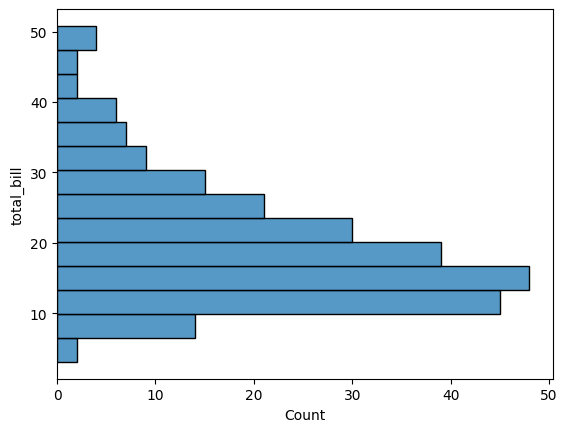

In [18]:
sns.histplot(data=tips, y='total_bill')
plt.show()

Figure, Axes(nrows=2, ncols=1) 2개를 생성, 위쪽에는 tip의 box plot, 아래쪽에는 tip의 hitogram을 그리세요.

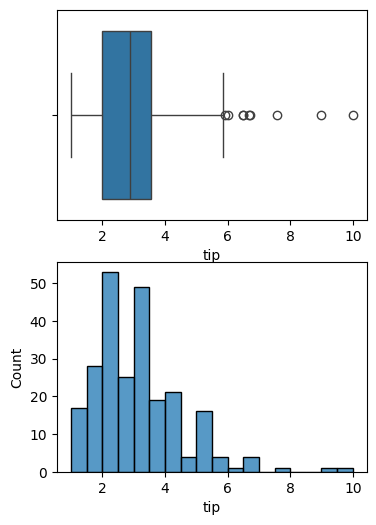

In [19]:
fig, axes = plt.subplots(nrows=2, figsize=(4, 6))

sns.boxplot(data=tips, x='tip', ax=axes[0])
sns.histplot(data=tips, x='tip', ax=axes[1])

plt.show()

# 막대 그래프

## `countplot()`

카테고리(범주) 타입 변수의 빈도수를 막대로 시각화.

In [20]:
tips.sex.value_counts()

,count
sex,
Male,157
Female,87


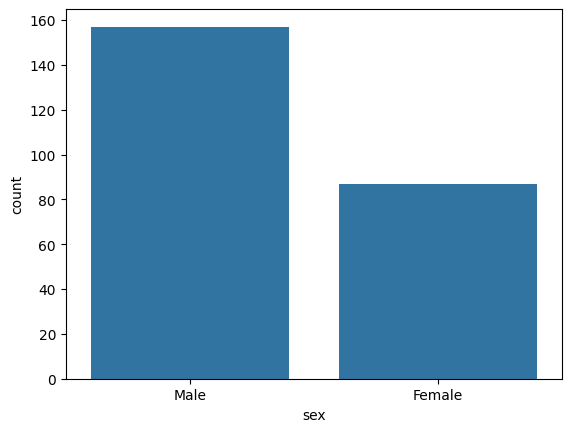

In [21]:
sns.countplot(data=tips, x='sex')
plt.show()

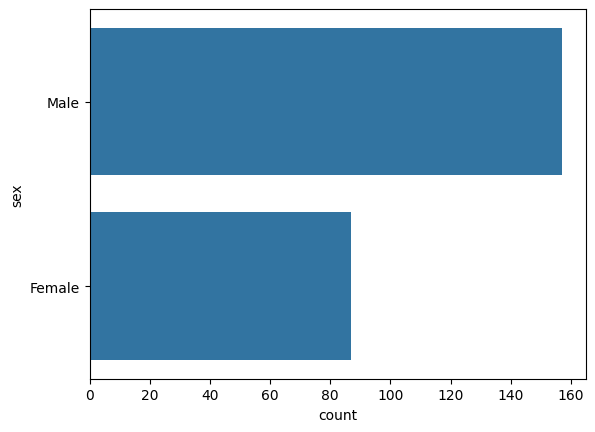

In [22]:
sns.countplot(data=tips, y='sex')
plt.show()

요일별 빈도수 막대 그래프

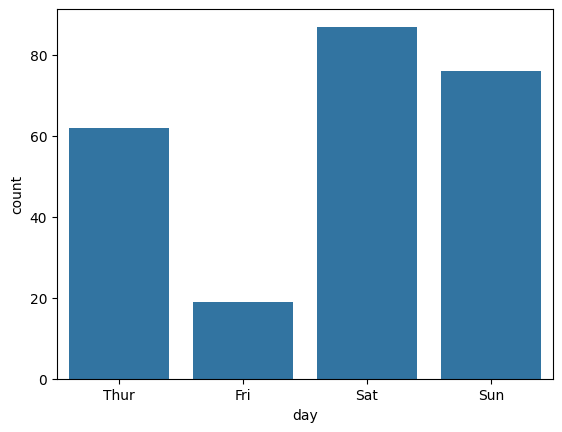

In [23]:
sns.countplot(data=tips, x='day')
plt.show()

In [24]:
tips.day.value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


요일별 성별 빈도수 막대 그래프

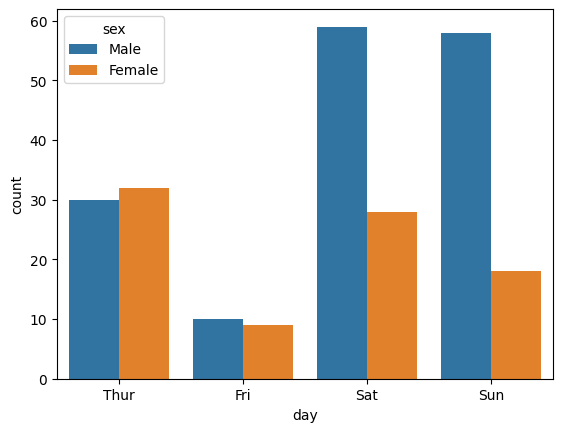

In [25]:
sns.countplot(data=tips, x='day', hue='sex')
plt.show()

In [26]:
days = tips.day.cat.categories
for d in days:
    print(f'--- {d} ---')
    subset = tips[tips.day == d]
    print(subset.sex.value_counts())

--- Thur ---
sex
Female    32
Male      30
Name: count, dtype: int64
--- Fri ---
sex
Male      10
Female     9
Name: count, dtype: int64
--- Sat ---
sex
Male      59
Female    28
Name: count, dtype: int64
--- Sun ---
sex
Male      58
Female    18
Name: count, dtype: int64


In [54]:
# data_frame.groupby([cat1, cat2, ...]).column_name.stat_func()
tips.groupby(by=['day', 'sex'], observed=False).sex.count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: sex, dtype: int64

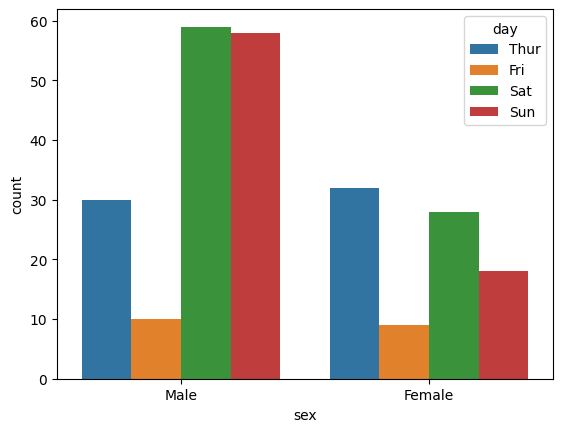

In [28]:
sns.countplot(data=tips, x='sex', hue='day')
plt.show()

In [55]:
tips.groupby(by=['sex', 'day'], observed=False).day.count()

sex     day 
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
Name: day, dtype: int64

성별 흡연여부별 빈도수 막대 그래프

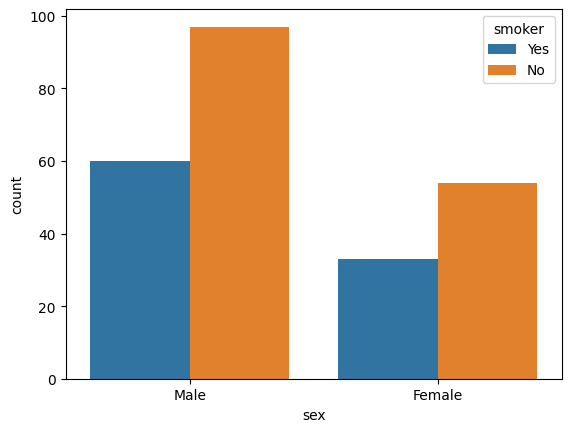

In [30]:
sns.countplot(data=tips, x='sex', hue='smoker')
plt.show()

In [56]:
tips.groupby(by=['sex', 'smoker'], observed=False).smoker.count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: smoker, dtype: int64

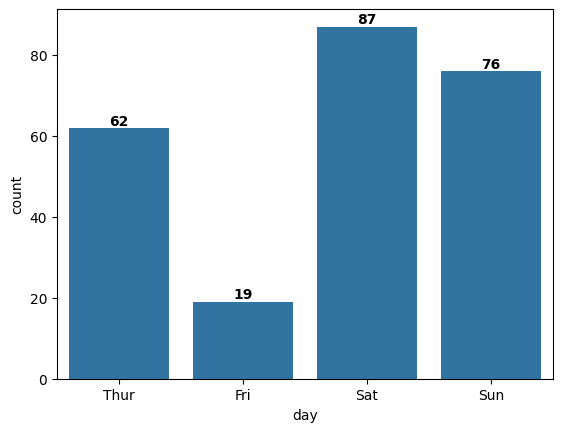

In [32]:
fig, ax = plt.subplots()
sns.countplot(data=tips, x='day')
for p in ax.patches:
    # print(p)
    ax.text(x=p.get_x() + p.get_width() / 2,    # 텍스트를 그릴 x 좌표
            y=p.get_y() + p.get_height() + 0.8, # 텍스트를 그릴 y 좌표
            s=f'{p.get_height():.0f}',          # 표시할 텍스트 내용
            ha='center',                        # horizontal alignment(수평(좌우)정렬)
            fontweight='bold')                  # font weight: light, regular, bold, ...

plt.show()

## `barplot()`

*   그룹별 변수(숫자 타입)의 기술 통계량(예: 평균, 최댓값, ...)을 막대로 시각화.
*   카테고리(범주) 타입 변수와 연속형 변수를 함께 시각화.

성별 팁의 평균

In [42]:
tips.groupby(by=['sex'], observed=False).tip.mean()

,tip
sex,
Male,3.089618
Female,2.833448


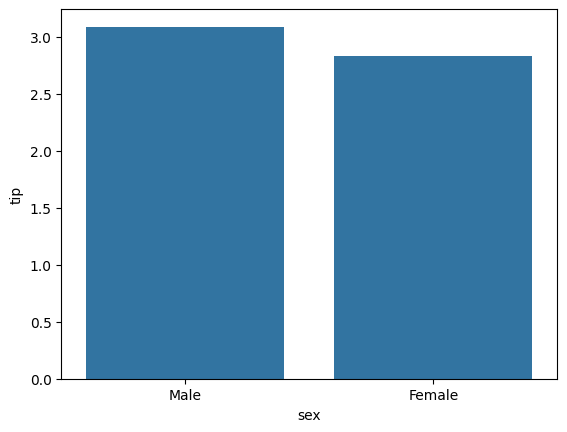

In [34]:
sns.barplot(data=tips, x='sex', y='tip', errorbar=None)
# estimator='mean' 기본값이기 때문에 막대의 높이(height)는 평균값.
plt.show()

성별 팁의 최댓값

In [43]:
tips.groupby(by=['sex'], observed=False).tip.max()

,tip
sex,
Male,10.0
Female,6.5


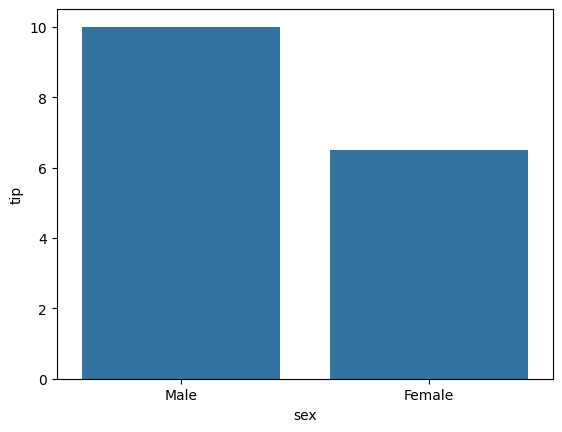

In [36]:
sns.barplot(data=tips, x='sex', y='tip', estimator='max', errorbar=None)
plt.show()

요일별 팁의 평균 가로 막대 그래프

In [44]:
tips.groupby(by=['day'], observed=False).tip.mean()

,tip
day,
Thur,2.771452
Fri,2.734737
Sat,2.993103
Sun,3.255132


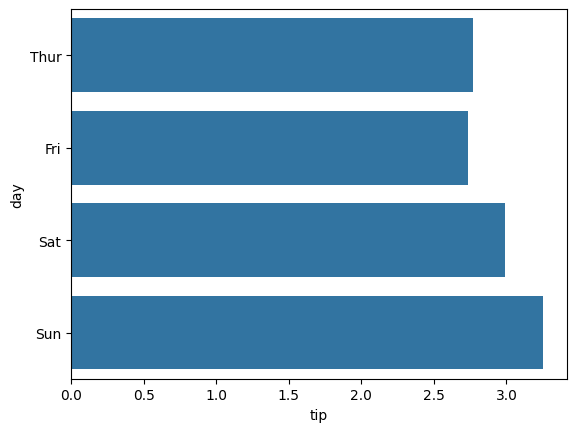

In [38]:
sns.barplot(data=tips, x='tip', y='day', errorbar=None)
plt.show()

요일별 성별 팁의 평균 세로 막대 그래프

In [45]:
tips.groupby(by=['day', 'sex'], observed=False).tip.mean()

day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

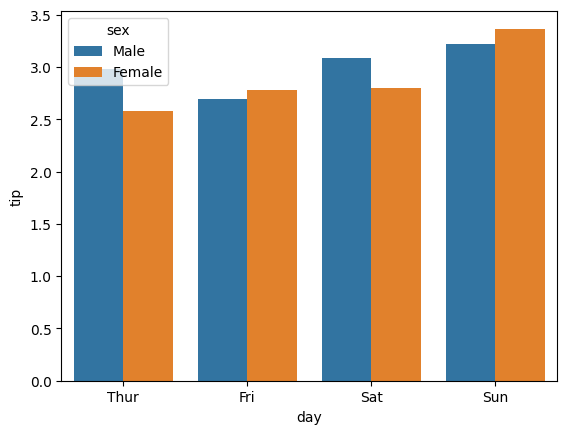

In [40]:
sns.barplot(data=tips, x='day', y='tip', hue='sex', errorbar=None)
plt.show()

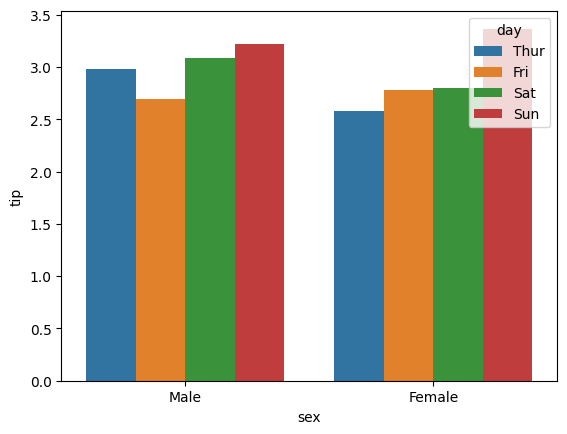

In [41]:
sns.barplot(data=tips, x='sex', y='tip', hue='day', errorbar=None)
plt.show()

# Scatter plot(산점도)

## `scatterplot()`

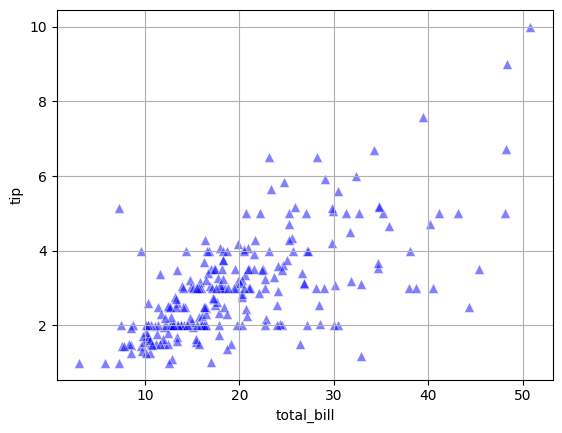

In [59]:
# tip ~ total_bill 산점도
sns.scatterplot(data=tips, x='total_bill', y='tip', s=50, marker='^', c='blue', alpha=0.5)
# sns.scatterplot() 함수의 **kwargs는 plt.scatter() 함수의 파라미터 이름들을 사용함.
# s=마커의 크기, marker=마커의 종류, c=마커 색깔, alpha=투명도
plt.grid()
plt.show()

## `regplot()`

regression plot: 산점도 + 선형 회귀(linear regression) 직선

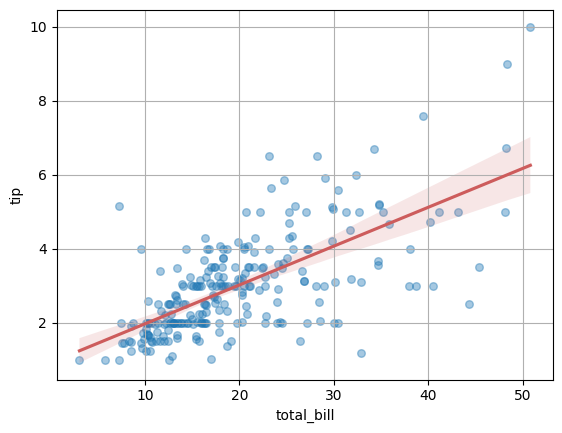

In [68]:
sns.regplot(data=tips, x='total_bill', y='tip',
            scatter_kws={'alpha': 0.4, 's': 30}, line_kws={'color': 'IndianRed'})
# sns.regplot() 함수의 scatter_kws 파라미터는 plt.scatter() 함수의 파라미터(아규먼트)들을 dict로 전달.
# sns.regplot() 함수의 line_kws 파라미터는 plt.plot() 함수의 파라미터(아규먼트)들을 dict로 전달.
plt.grid()
plt.show()

## `jointplot()`

산점도 + 히스토그램

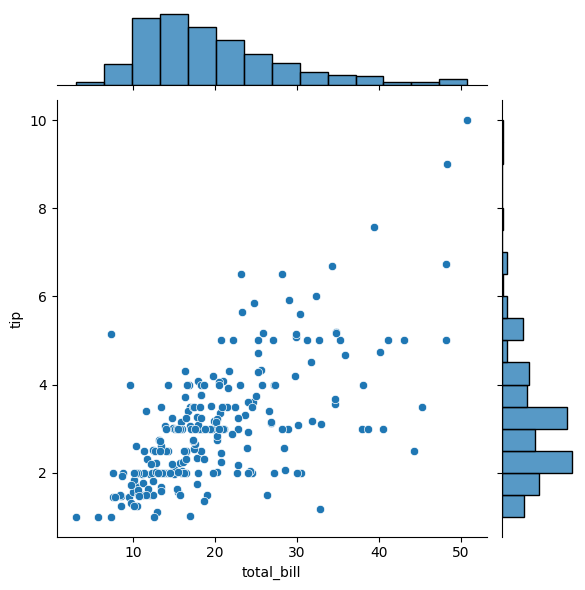

In [69]:
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.show()

## Ex 1.
tip ~ total_bill 산점도. 마커의 색깔을 성별에 따라서 다르게 시각화.

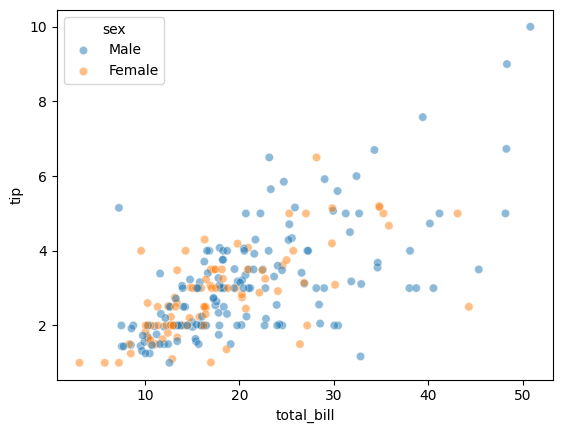

In [71]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', alpha=0.5)
plt.show()

## Ex 2.
tip ~ total_bill 산점도. 마커의 색깔은 성별에 따라서, 마커의 크기를 size(인원수)에 따라서 다르게 시각화.

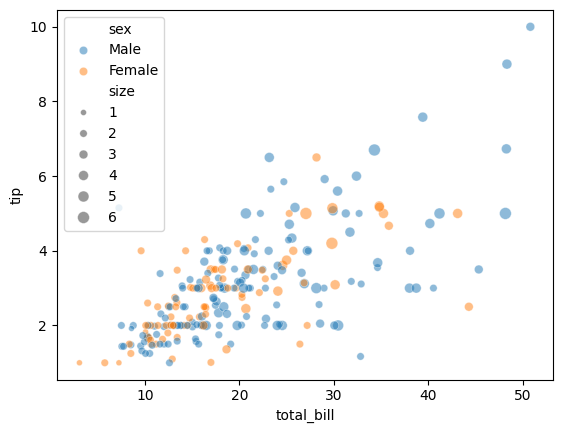

In [73]:
sns.scatterplot(data=tips, x='total_bill', y='tip',
                hue='sex', size='size', alpha=0.5)
plt.show()

## Ex 3.
tip ~ total_bill 산점도. 마커 색깔은 성별에 따라서, 마커의 모양을 흡연 여부에 따라서 다르게 시각화.

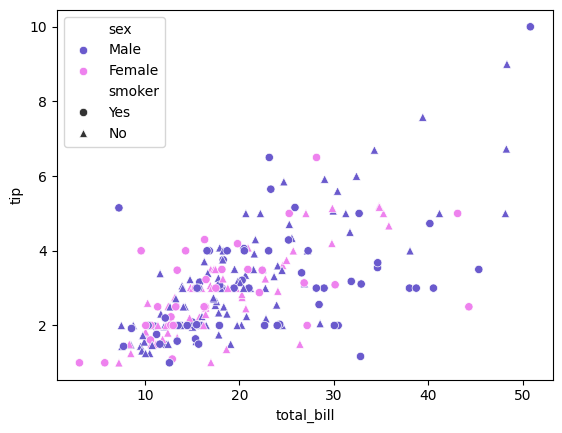

In [83]:
sns.scatterplot(data=tips, x='total_bill', y='tip',
                hue='sex', style='smoker',
                palette=['SlateBlue', 'Violet'], markers=['o', '^'])
plt.show()

# Line plot(선 그래프)

In [84]:
np.random.seed(42)
df = pd.DataFrame(data={
    'day': np.arange(1, 11),
    'price': np.random.rand(10)
})
df

,day,price
0,1,0.374540
1,2,0.950714
2,3,0.731994
3,4,0.598658
4,5,0.156019
5,6,0.155995
6,7,0.058084
7,8,0.866176
8,9,0.601115
9,10,0.708073


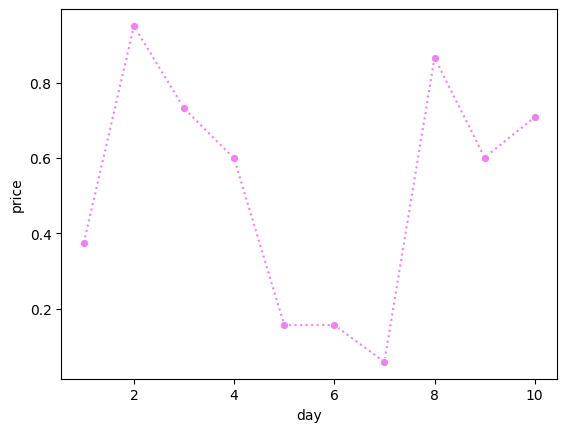

In [96]:
sns.lineplot(data=df, x='day', y='price', marker='o', linestyle=':', color='violet')
# sns.lineplot() 함수의 **kwargs는 plt.plot() 함수의 파라미터들을 사용.
plt.show()

# Category plot

카테고리(범주) 별로 Axes(서브플롯) 객체를 생성하고, 변수의 통계값을 모든 Axes에 같은 종류의 그래프로 시각화.

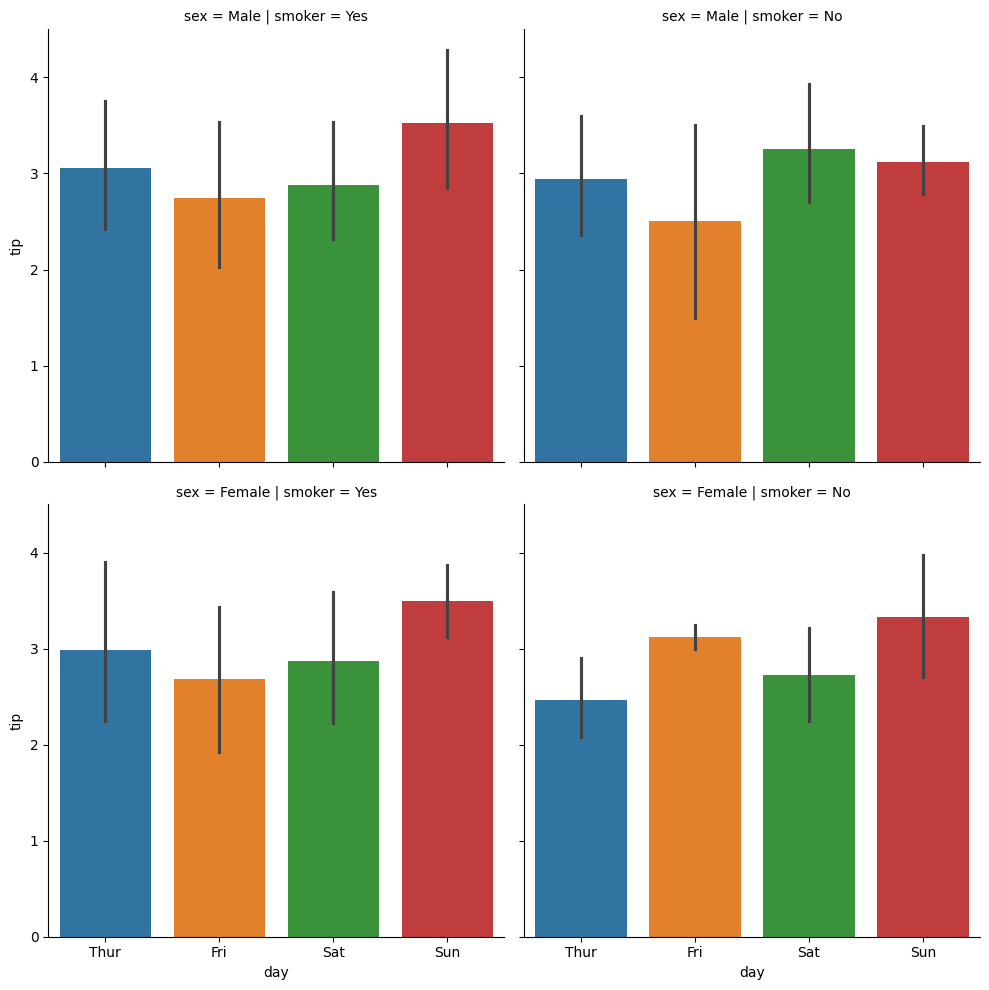

In [101]:
# 요일(x축)별 팁의 평균(y축) 막대 그래프
# 성별로 Axes를 나누고(서브플롯의 행), 흡연여부별로 Axes를 나눠서(서브플롯의 열) 시각화.
sns.catplot(data=tips, x='day', y='tip',
            hue='day', row='sex', col='smoker', kind='bar')
# 파라미터 row: Axes의 행을 나누는 기준(카테고리)이 되는 변수
# 파라미터 col: Axes의 열을 나눈는 기준(카테고리)이 되는 변수
# 파라미터 kind: 각각의 Axes에 시각화할 그래프 종류(기본값: strip). bar, box, ...
plt.show()

In [102]:
tips.groupby(by=['sex', 'smoker', 'day'], observed=False).tip.mean()

sex     smoker  day 
Male    Yes     Thur    3.058000
                Fri     2.741250
                Sat     2.879259
                Sun     3.521333
        No      Thur    2.941500
                Fri     2.500000
                Sat     3.256563
                Sun     3.115349
Female  Yes     Thur    2.990000
                Fri     2.682857
                Sat     2.868667
                Sun     3.500000
        No      Thur    2.459600
                Fri     3.125000
                Sat     2.724615
                Sun     3.329286
Name: tip, dtype: float64

## Ex 1.

*   요일별 팁의 평균 막대 그래프. 흡연여부(subplot의 행), 시간(subplot의 열)으로 Axes를 나눠서 그래프 작성.
*   groupby 메서드와 통계 함수를 이용해 값 계산.

## Ex 2.

*   요일별(x축), 성별(색깔) 팁의 평균 막대 그래프. 흡연여부(subplot의 행), 시간(subplot의 열)으로 Axes를 나눠서 그래프 작성.
*   groupby 메서드와 통계 함수를 이용해 값들 계산.

## Ex 3.

*   요일별 팁의 box plot. 흡연여부(subplot의 행), 시간(subplot의 열)으로 Axes를 나눠서 그래프 작성.
*   groupby 메서드와 통계 함수를 이용해 값들 계산.